In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [65]:
train=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\train_yhhx1Xs\train.csv')

In [66]:
test=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\test_QkPvNLx.csv')

In [67]:
sub=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\subwomen.csv')

In [68]:
train.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [6]:
test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [7]:
train.shape

(512087, 11)

In [8]:
test.shape

(36000, 9)

In [9]:
train.isnull().sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [10]:
test.isnull().sum()

ID                      0
Day_No                  0
Course_ID               0
Course_Domain           0
Course_Type             0
Short_Promotion         0
Public_Holiday          0
Long_Promotion          0
Competition_Metric    120
dtype: int64

In [11]:
train.select_dtypes(include=['int64','float64']).columns

Index(['ID', 'Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'User_Traffic', 'Competition_Metric', 'Sales'],
      dtype='object')

In [12]:
train.select_dtypes(include=['object']).columns


Index(['Course_Domain', 'Course_Type'], dtype='object')

In [13]:
train.Course_Domain.value_counts()

Development             264295
Software Marketing      166172
Finance & Accounting     77210
Business                  4410
Name: Course_Domain, dtype: int64

In [14]:
test.Course_Domain.value_counts()

Development             18480
Software Marketing      11880
Finance & Accounting     5340
Business                  300
Name: Course_Domain, dtype: int64

In [15]:
train.User_Traffic.head()

0    11004
1    13650
2    11655
3    12054
4     6804
Name: User_Traffic, dtype: int64

In [16]:
train.Course_Type.value_counts()

Course     262747
Program    247576
Degree       1764
Name: Course_Type, dtype: int64

In [17]:
train.Short_Promotion.value_counts()

0    317369
1    194718
Name: Short_Promotion, dtype: int64

In [18]:
test.Short_Promotion.value_counts()

0    21600
1    14400
Name: Short_Promotion, dtype: int64

In [19]:
train.Long_Promotion.value_counts()

0    261693
1    250394
Name: Long_Promotion, dtype: int64

In [20]:
test.Long_Promotion.value_counts()

1    18060
0    17940
Name: Long_Promotion, dtype: int64

In [21]:
train.Public_Holiday.value_counts()

0    495885
1     16202
Name: Public_Holiday, dtype: int64

In [22]:
test.Public_Holiday.value_counts()

0    35605
1      395
Name: Public_Holiday, dtype: int64

In [23]:
 train['Competition_Metric']= train['Competition_Metric'].fillna((train['Competition_Metric'].mean()))

In [24]:
test['Competition_Metric'] = test['Competition_Metric'].fillna((test['Competition_Metric'].mean()))

In [25]:
test.Competition_Metric.isnull().sum()

0

In [26]:
train.Competition_Metric.isnull().sum()

0

In [27]:
train.Competition_Metric.value_counts()

0.001    20800
0.003    18852
0.002    16390
0.004    15838
0.009    11980
         ...  
0.263      698
0.171      698
0.326      698
0.096      698
0.218      698
Name: Competition_Metric, Length: 197, dtype: int64

C:\Users\ananyya srivastava\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


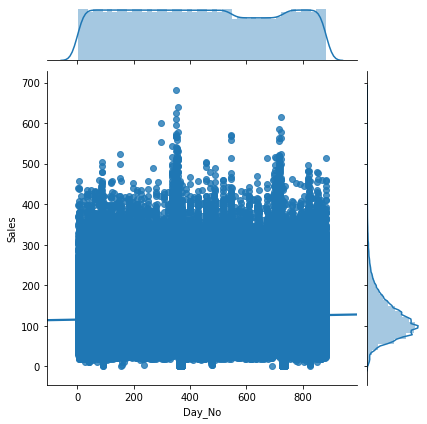

In [28]:
g = sns.jointplot(x = train['Day_No'], y = train['Sales'],kind="reg")

In [29]:
# Remove outliers manually (Two points in the bottom right)
train = train.drop(train[(train['Day_No']>800) & (train['Sales']>500)].index).reset_index(drop=True)

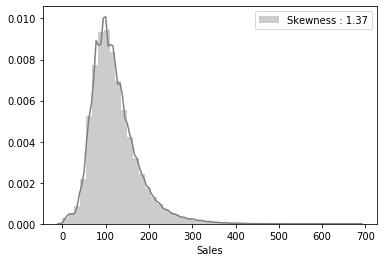

In [30]:
g = sns.distplot(train['Sales'],color="gray")
g = g.legend(['Skewness : {:.2f}'.format(train['Sales'].skew())],loc='best')


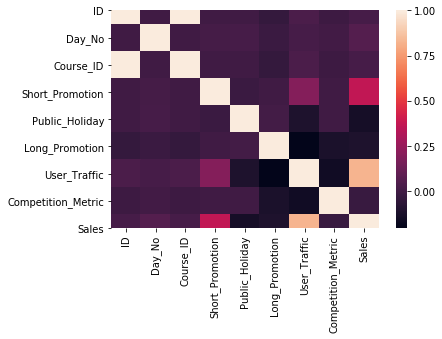

In [31]:
corrmat = train.corr()
g = sns.heatmap(train.corr())

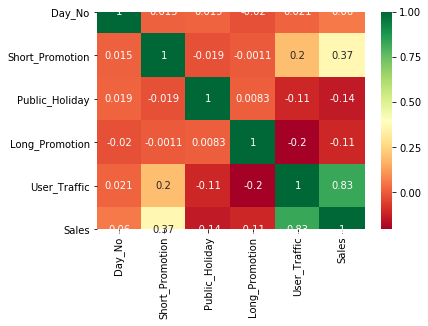

In [32]:
# most correlated features
top_corr_features = corrmat.index[abs(corrmat["Sales"])>0.05]
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

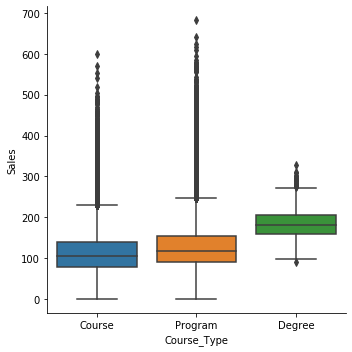

In [33]:
g = sns.catplot(x="Course_Type",y="Sales",data=train,kind='box')

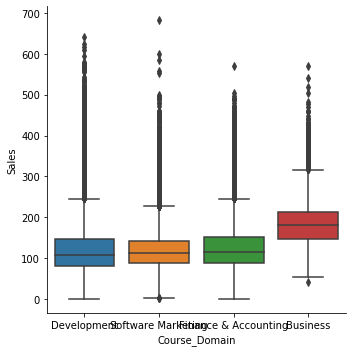

In [34]:
g = sns.catplot(x="Course_Domain",y="Sales",data=train,kind='box')

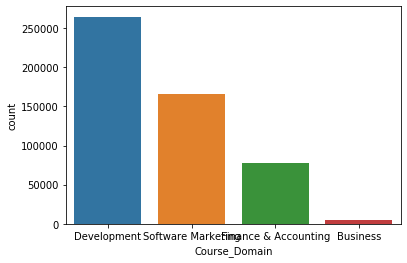

In [35]:
g = sns.countplot(train["Course_Domain"])

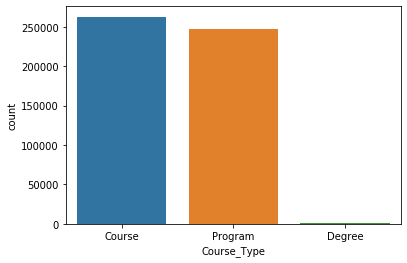

In [36]:
g = sns.countplot(train["Course_Type"])

C:\Users\ananyya srivastava\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

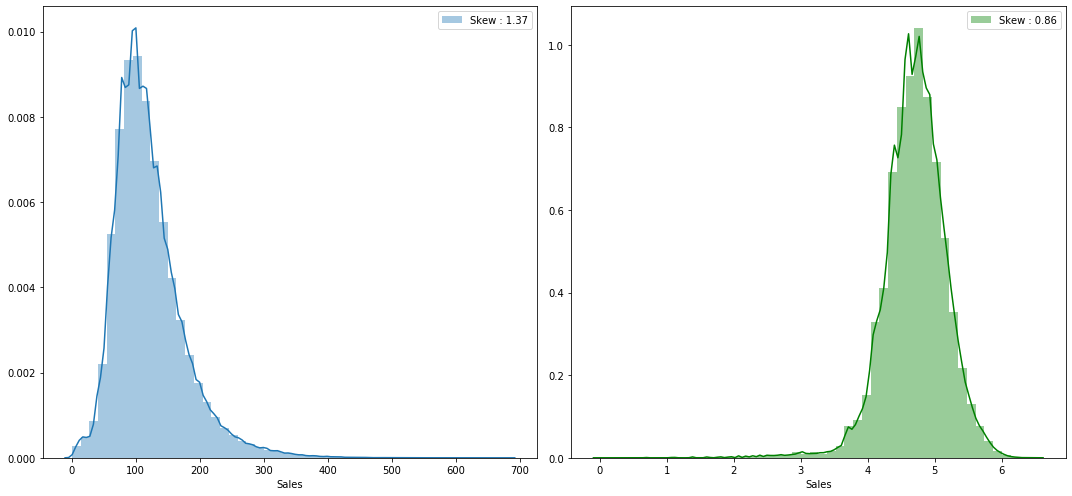

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure(1)
fig, axes = plt.subplots(1,2,figsize=(15,7))

sns.distplot(train["Sales"],ax = axes[0])
sns.distplot(np.log1p(train["Sales"]),ax = axes[1],color="g")

axes[0].legend(["Skew : {:.2f}".format(train["Sales"].skew())])
axes[1].legend(["Skew : {:.2f}".format(np.log1p(train["Sales"].skew()))])

plt.tight_layout()
plt.show()
plt.gcf().clear()


In [38]:
map1={'Course':0,'Program':1,'':2,'Degree':3}
train['Course_Type']=train['Course_Type'].map(map1)



In [39]:
map12={'Course':0,'Program':1,'':2,'Degree':3}
test['Course_Type']=test['Course_Type'].map(map12)


In [40]:
test['Course_Type'].isnull().sum()

0

In [41]:
map23={'Development':0,'Software Marketing':1,'Finance & Accounting':2,'Business':3}
train['Course_Domain']=train['Course_Domain'].map(map23)

In [42]:

test['Course_Domain']=test['Course_Domain'].map(map23)

In [43]:
train['Course_Domain'].head()

0    0
1    0
2    0
3    0
4    0
Name: Course_Domain, dtype: int64

In [44]:
train.drop(['User_Traffic'],axis=1,inplace=True)

In [45]:
train.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Sales
0,1,1,1,0,0,0,1,1,0.007,81
1,2,2,1,0,0,0,0,1,0.007,79
2,3,3,1,0,0,0,0,1,0.007,75
3,4,4,1,0,0,0,0,1,0.007,80
4,5,5,1,0,0,0,0,1,0.007,41


In [46]:
train['Sales'].describe()

count    512086.000000
mean        120.826156
std          54.352534
min           0.000000
25%          84.000000
50%         111.000000
75%         146.000000
max         682.000000
Name: Sales, dtype: float64

In [47]:
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import train_test_split as tt


In [48]:
x = train.drop(['Sales'], axis=1)
y = train[['Sales']]
x_test = test
#x_train, x_val, y_train, y_val = tt(x, y, test_size=0.20, random_state=42, shuffle=True)

In [49]:
train.isnull().sum()

ID                    0
Day_No                0
Course_ID             0
Course_Domain         0
Course_Type           0
Short_Promotion       0
Public_Holiday        0
Long_Promotion        0
Competition_Metric    0
Sales                 0
dtype: int64

In [50]:
test.isnull().sum()

ID                    0
Day_No                0
Course_ID             0
Course_Domain         0
Course_Type           0
Short_Promotion       0
Public_Holiday        0
Long_Promotion        0
Competition_Metric    0
dtype: int64

In [ ]:
from sklearn.ensemble import  ExtraTreesRegressor
etc = ExtraTreesRegressor()
etc.fit(x.values, np.array(y))

In [ ]:
etc_pred=etc.predict(x_test)

In [ ]:
etc_pred

In [ ]:
abc.fit(x.values,np.array(y))

In [ ]:
abc_pred = abc.predict(test)

In [ ]:
abc_pred

In [52]:
from sklearn.ensemble import RandomForestRegressor
mm=RandomForestRegressor(n_jobs=-1,n_estimators=200,oob_score=True)

C:\Users\ananyya srivastava\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [54]:
mm.fit(x,np.array(y))

C:\Users\ananyya srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [57]:
y_preds=mm.predict(x_test)
np.sum(y_preds<0)

0

In [58]:
y_preds

array([124.38, 124.38, 124.38, ..., 169.35, 169.35, 169.35])

In [59]:
sub['ID']=x_test.ID
sub['Sales']=y_preds


In [60]:
sub.head()

,ID,Sales
0,883,124.380
1,884,124.380
2,885,124.380
3,886,124.380
4,887,96.125


In [61]:
pd.DataFrame(sub, columns=['ID','Sales']).to_csv('whr.csv',index=False)